In [1]:
#importing require python classes and packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Activation, RepeatVector
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional #class for bidirectional LSTM as BILSTM to implement as extension
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [2]:
#use to scale or normalize dataset values
normalizer = StandardScaler()

In [3]:
#load and display dataset values
dataset = pd.read_csv("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/Driving_Style.csv")
dataset.fillna(0, inplace = True)
dataset

,angle,angle_speed,AccZ,brake,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,CONSERVATIVE,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,CONSERVATIVE,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,CONSERVATIVE,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,CONSERVATIVE,3583791


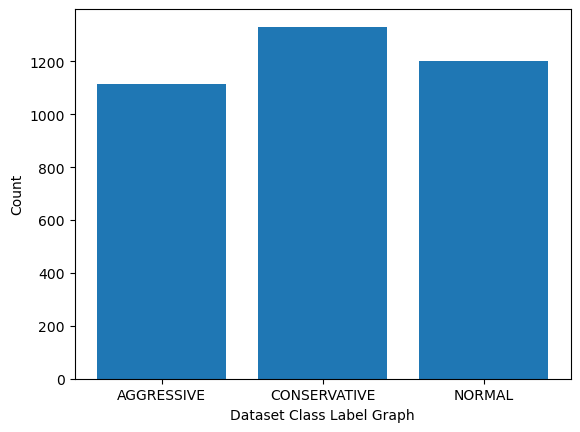

In [4]:
#plot labels in dataset
labels, count = np.unique(dataset['Class'], return_counts = True)
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.show()

In [5]:
#convert non numeric class label to numeric data using label encoder class
le = LabelEncoder()
dataset['Class'] = pd.Series(le.fit_transform(dataset['Class'].astype(str)))
#now display class label with numeric id
dataset

,angle,angle_speed,AccZ,brake,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,2,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,2,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,2,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,2,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,2,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,1,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,1,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,1,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,1,3583791


In [6]:
#now extract X training features and Y class labels from dataset
Y = dataset['Class'].ravel()
dataset.drop('Class', axis=1, inplace=True)
X = dataset.values
#normalize dataset values for preprocessing
normalizer = StandardScaler()
X = normalizer.fit_transform(X)
print("Normalized Dataset Values")
print(X)
#shuffle dataset values
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
Y = to_categorical(Y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

Normalized Dataset Values
[[-0.04106156  0.08127915 -0.00839798 ... -1.37441784  0.8125563
  -1.67859727]
 [-1.68980215 -1.11711676 -0.21570562 ...  0.41672656  1.10301486
  -1.67703978]
 [-0.64445974 -0.05423733  0.21547871 ... -0.22227632  0.69109187
  -1.67703978]
 ...
 [-0.26718077  0.90859762 -0.9094098  ... -3.21397144  0.40063334
   1.68713268]
 [-0.39561936  0.15574161  0.39200552 ...  0.16983909 -0.11162986
   1.68869016]
 [-0.44940287  0.53099161 -0.43788106 ... -0.04316186 -0.05881923
   1.68869016]]


C:\Users\Akash Sharma\AppData\Local\Temp\ipykernel_8164\1804742048.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Y = dataset['Class'].ravel()


In [7]:
#split dataset into train and test where 80% dataset is for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 2915
Testing Size (20%): 729



In [8]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [9]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100     
    print()
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))    
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

C:\Users\Akash Sharma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

CNN Accuracy  : 29.218106995884774
CNN Precision   : 23.010752688172044
CNN Recall      : 33.37361609231249
CNN FMeasure    : 16.475339152381956


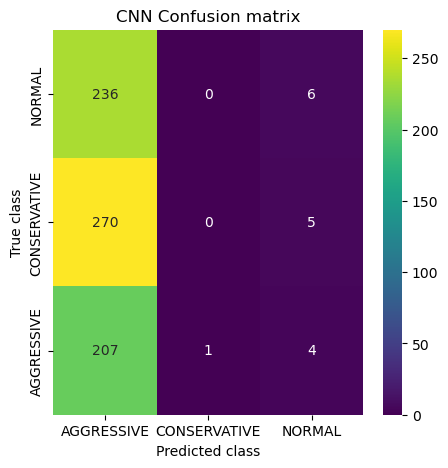

In [18]:
#now train CNN algorithm using two layers CNN and 1 layer maxpooling
cnn_model = Sequential()
#cnn first layer to filter dataset features
cnn_model.add(Conv1D(filters=4, kernel_size = 2, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
#cnn second layer
cnn_model.add(Conv1D(filters=3, kernel_size = 2, activation = 'relu'))
#max pool layer to collect relevant features
cnn_model.add(MaxPooling1D(pool_size = 1))
cnn_model.add(Flatten())
#output layer for Y target prediction
cnn_model.add(Dense(units = 16, activation = 'softmax'))
cnn_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train, y_train, batch_size = 8, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
#else:
    #cnn_model = load_model("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/model/cnn_weights.hdf5")
#perform prediction on test data using CNN model   
predict = cnn_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
calculateMetrics("CNN", predict, y_test1)

C:\Users\Akash Sharma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

Propose CNN + LSTM Accuracy  : 29.080932784636488
Propose CNN + LSTM Precision   : 9.693644261545495
Propose CNN + LSTM Recall      : 33.33333333333333
Propose CNN + LSTM FMeasure    : 15.019482819695359


C:\Users\Akash Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


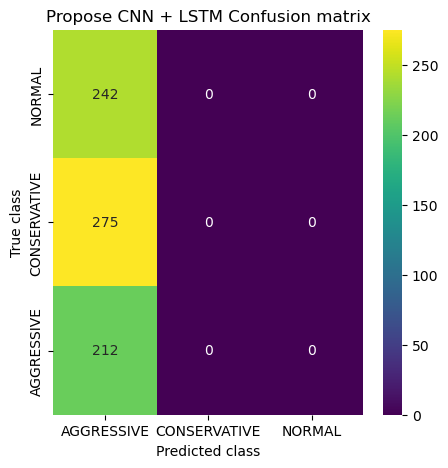

In [22]:
#now define CNN + LSTM model where CNN is used to extarct temporal fetaures and LSTM will perform classification
#on trained temporal features
cnn_lstm_model = Sequential()
#CNN first layers
cnn_lstm_model.add(Conv1D(filters=24, kernel_size = 4, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
cnn_lstm_model.add(Conv1D(filters=16, kernel_size = 4, activation = 'relu'))
#max pool layer to collect optimized features from above CONV layer
cnn_lstm_model.add(MaxPooling1D(pool_size = 1))
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(RepeatVector(2))
#adding LSTM layer for classification using extarcted temporal features
cnn_lstm_model.add(LSTM(32, activation = 'relu'))
cnn_lstm_model.add(Dense(units = 50, activation = 'softmax'))
#define output layer
cnn_lstm_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train model
cnn_lstm_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/model/cnn_lstm_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_lstm_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_lstm_model.fit(X_train, y_train, batch_size = 8, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_lstm_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
#else:
    #cnn_lstm_model = load_model("model/cnn_lstm_weights.hdf5")
#perform prediction on test data using CNN +LSTM propose model   
predict = cnn_lstm_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
calculateMetrics("Propose CNN + LSTM", predict, y_test1)

C:\Users\Akash Sharma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

Extension CNN + LSTM + Bidirectional LSTM Accuracy  : 33.19615912208505
Extension CNN + LSTM + Bidirectional LSTM Precision   : 11.06538637402835
Extension CNN + LSTM + Bidirectional LSTM Recall      : 33.33333333333333
Extension CNN + LSTM + Bidirectional LSTM FMeasure    : 16.61517336079643


C:\Users\Akash Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


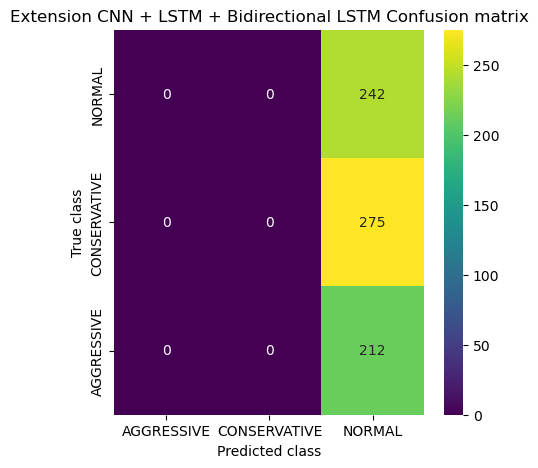

In [30]:
#now define extension model by combining CNN + LSTM + Bidirectional LSTM as this bi-lstm will optimized features from 
#both forward and backward direction so it will have more optimzied features and accuracy will be better
extension_model = Sequential()
#defining CNN layer
extension_model.add(Conv1D(filters=32, kernel_size = 6, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
extension_model.add(Conv1D(filters=16, kernel_size = 2, activation = 'relu'))
#adding maxpool layer
extension_model.add(MaxPooling1D(pool_size = 1))
extension_model.add(Flatten())
extension_model.add(RepeatVector(2))
#adding bidirectional + LSTM to CNN layer
extension_model.add(Bidirectional(LSTM(32, activation = 'relu')))
#defining output layer
extension_model.add(Dense(units = 100, activation = 'softmax'))
extension_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train the model
extension_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/model/extension_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/extension_weights.hdf5', verbose = 1, save_best_only = True)
    hist = extension_model.fit(X_train, y_train, batch_size = 8, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/extension_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
#else:
    #extension_model = load_model("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/model/extension_weights.hdf5")
#perform prediction on test data using bidirectional LSTM on test data   
predict = extension_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
calculateMetrics("Extension CNN + LSTM + Bidirectional LSTM", predict, y_test1)

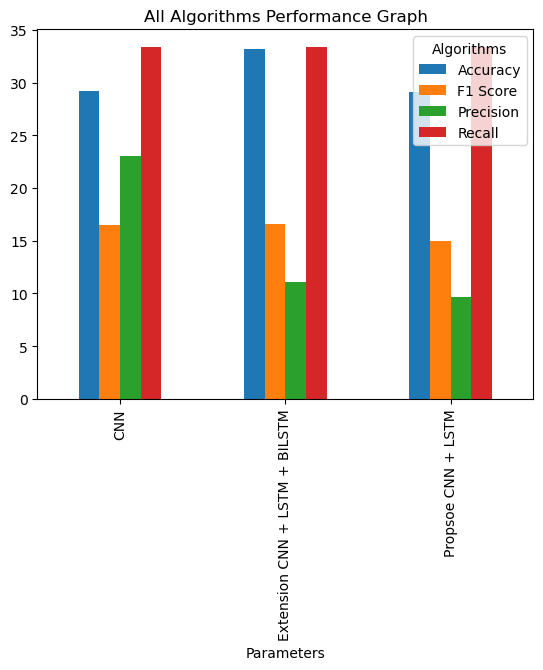

In [40]:
#all algorithms performance graph
df = pd.DataFrame([['CNN','Precision',precision[0]],['CNN','Recall',recall[0]],['CNN','F1 Score',fscore[0]],['CNN','Accuracy',accuracy[0]],
                   ['Propsoe CNN + LSTM','Precision',precision[1]],['Propsoe CNN + LSTM','Recall',recall[1]],['Propsoe CNN + LSTM','F1 Score',fscore[1]],['Propsoe CNN + LSTM','Accuracy',accuracy[1]],
                   ['Extension CNN + LSTM + BILSTM','Precision',precision[2]],['Extension CNN + LSTM + BILSTM','Recall',recall[2]],['Extension CNN + LSTM + BILSTM','F1 Score',fscore[2]],['Extension CNN + LSTM + BILSTM','Accuracy',accuracy[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [42]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["CNN", "Propose CNN + LSTM", "Extension CNN + LSTM + BI-LSTM"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,CNN,23.010753,33.373616,16.475339,29.218107
1,Propose CNN + LSTM,9.693644,33.333333,15.019483,29.080933
2,Extension CNN + LSTM + BI-LSTM,11.065386,33.333333,16.615173,33.196159


In [56]:
testData = pd.read_csv("C:/Users/Akash Sharma/OneDrive/Desktop/CNN-LSTM Driving Style Classification Model Based on Driver Operation Time Series Data/Dataset/testData.csv")#reading test data
testData.fillna(0, inplace = True)
temp = testData.values
testData = testData.values
test = normalizer.transform(testData)#normalizing values
test = np.reshape(test, (test.shape[0], test.shape[1], 1))
predict = extension_model.predict(test)#performing prediction on test data using extension model object
for i in range(len(predict)):
    y_pred = np.argmax(predict[i])
    print("Test Data = "+str(temp[i])+" Predicted Style ====> "+labels[y_pred]+"\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test Data = [ 2.5347030e-01 -4.1313040e-01  3.2444763e-01 -7.5594574e-02
 -8.9186326e-02 -1.9089539e-03  3.5833270e+06] Predicted Style ====> NORMAL

Test Data = [-6.3623285e-01  1.1276133e+00 -5.0986860e-01 -7.3151110e-02
 -3.2803464e-01  3.5117117e-01  3.5819320e+06] Predicted Style ====> NORMAL

Test Data = [-1.4737010e+00  1.1309308e-01  5.8971310e-01  2.5961774e-03
 -1.5760323e-01  1.1453723e-03  3.5828250e+06] Predicted Style ====> NORMAL

Test Data = [-1.67121240e+00  1.01218164e-01  1.55298610e+00  1.02778080e-01
  1.20340450e-01  5.20380850e-01  3.58193200e+06] Predicted Style ====> NORMAL

Test Data = [-7.4113570e-01 -1.1082448e-01 -6.2355995e-01  4.0469820e-02
  2.5228736e-01  5.1847186e-02  3.5828250e+06] Predicted Style ====> NORMAL

Test Data = [-9.15281650e-01 -3.79521370e-01 -1.19895740e+00 -2.30601630e-02
 -5.98647930e-02 -1.29045285e-02  3.58332600e+06] Predicted Style ====> NORMAL

